## Applied Statistics 

### Turma 9DTSR

### Trabalho prático usando Python
 
### Modelo de regressão linear múltipla - Efeito de colinearidade e variável preditora qualitativa

Dataset Bike Sharing

Descrição: Os sistemas de compartilhamento de bicicletas são uma nova geração de aluguel de bicicletas tradicional, onde todo o processo de associação, locação e devolução tornou-se automático. Através destes sistemas, o usuário pode facilmente alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Atualmente, existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, compostos por mais de 500 mil bicicletas. Hoje, existe um grande interesse nesses sistemas devido ao seu importante papel no trânsito, questões ambientais e de saúde.

Fonte de dados: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


Dicionário de variáveis:
- instant: ID
- dteday: ID
- season: (1:winter, 2=springer, 3:summer, 4:fall)
- yr: year (0: 2011, 1:2012)
- mnth: ( 1 to 12)
- holiday (0=no;1=yes)
- weekday (day of the week)
- workingday (0=no;1=yes) 
- weathersit (1: Clear, Few clouds , Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, 
              Mist + Few clouds, Mist;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
              Scattered clouds;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
- temp (Normalized temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, 
        t_max=+39 (only in hourly scale)
- atemp (Normalized feeling temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min),
   t_min=-16, t_max=+50 (only in hourly scale)
- hum (Normalized humidity_. The values are divided to 100 (max)
- windspeed	Normalized wind speed. The values are divided to 67 (max)
- casual (count of casual users)
- registered (count of registered users) 
- cnt (count of total rental bikes including both casual and registered)






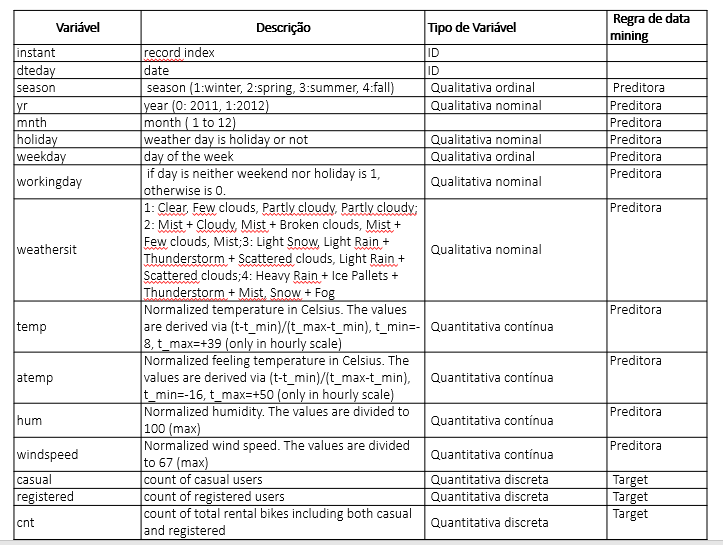

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pearsonr
import statsmodels.api as sm


In [2]:
# Importar a base de dados 
df=pd.read_csv('Bike_Sharing.csv')

In [3]:
# Visualizar os dados
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
# Verificar os formatos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Análise descritiva
df.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [6]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['season']= df['season'].astype(str)
df['mnth']= df['mnth'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)
df['yr'] = df['yr'].astype(str)
df['workingday'] = df['workingday'].astype(str)
df['holiday'] = df['holiday'].astype(str)

In [7]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    object 
 4   mnth        731 non-null    object 
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    object 
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [8]:
df.describe().round(2)

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


In [9]:
# modificando os nomes das colunas
df.columns = ['ID', 'data', 'estacao','ano','mes', 'feriado','dia_semana','dia_util','clima', 'temperatura','sensacao_termica',
             'umidade','vel_vento','casual', 'registrada', 'total']

In [10]:
# Verificar os nomes das variáveis
# informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                731 non-null    int64  
 1   data              731 non-null    object 
 2   estacao           731 non-null    object 
 3   ano               731 non-null    object 
 4   mes               731 non-null    object 
 5   feriado           731 non-null    object 
 6   dia_semana        731 non-null    object 
 7   dia_util          731 non-null    object 
 8   clima             731 non-null    object 
 9   temperatura       731 non-null    float64
 10  sensacao_termica  731 non-null    float64
 11  umidade           731 non-null    float64
 12  vel_vento         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registrada        731 non-null    int64  
 15  total             731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory us

In [11]:
# Selecionar as variáveis quantitativas
var_num = ['temperatura','sensacao_termica','umidade','vel_vento', 'total']

In [12]:
# Selecionar as variáveis qualitativas
var_cat =['estacao','ano','mes', 'feriado','dia_semana','dia_util','clima']

In [13]:
# Análise descritiva: medidas resumo
df[var_num].describe().round(2)

,temperatura,sensacao_termica,umidade,vel_vento,total
count,731.00,731.00,731.00,731.00,731.00
mean,0.50,0.47,0.63,0.19,4504.35
std,0.18,0.16,0.14,0.08,1937.21
min,0.06,0.08,0.00,0.02,22.00
25%,0.34,0.34,0.52,0.13,3152.00
50%,0.50,0.49,0.63,0.18,4548.00
75%,0.66,0.61,0.73,0.23,5956.00
max,0.86,0.84,0.97,0.51,8714.00


## Criar variáves dummies 

In [14]:
# Criar variáveis dummies para cada variável qualitativa e excluir a primeira categoria de cada variável
var_dummies = pd.get_dummies(df[var_cat], drop_first = True, dtype=int)
print(var_dummies)


     estacao_2  estacao_3  estacao_4  ano_1  mes_10  mes_11  mes_12  mes_2  \
0            0          0          0      0       0       0       0      0   
1            0          0          0      0       0       0       0      0   
2            0          0          0      0       0       0       0      0   
3            0          0          0      0       0       0       0      0   
4            0          0          0      0       0       0       0      0   
..         ...        ...        ...    ...     ...     ...     ...    ...   
726          0          0          0      1       0       0       1      0   
727          0          0          0      1       0       0       1      0   
728          0          0          0      1       0       0       1      0   
729          0          0          0      1       0       0       1      0   
730          0          0          0      1       0       0       1      0   

     mes_3  mes_4  ...  feriado_1  dia_semana_1  dia_semana_2  

In [15]:
# Merge dos arquivos df e dummies
df = pd.concat([df, var_dummies], axis=1)

print(df.head())


   ID        data estacao ano mes feriado dia_semana dia_util clima  \
0   1  2011-01-01       1   0   1       0          6        0     2   
1   2  2011-01-02       1   0   1       0          0        0     2   
2   3  2011-01-03       1   0   1       0          1        1     1   
3   4  2011-01-04       1   0   1       0          2        1     1   
4   5  2011-01-05       1   0   1       0          3        1     1   

   temperatura  ...  feriado_1  dia_semana_1  dia_semana_2  dia_semana_3  \
0     0.344167  ...          0             0             0             0   
1     0.363478  ...          0             0             0             0   
2     0.196364  ...          0             1             0             0   
3     0.200000  ...          0             0             1             0   
4     0.226957  ...          0             0             0             1   

   dia_semana_4  dia_semana_5  dia_semana_6  dia_util_1  clima_2  clima_3  
0             0             0           

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                731 non-null    int64  
 1   data              731 non-null    object 
 2   estacao           731 non-null    object 
 3   ano               731 non-null    object 
 4   mes               731 non-null    object 
 5   feriado           731 non-null    object 
 6   dia_semana        731 non-null    object 
 7   dia_util          731 non-null    object 
 8   clima             731 non-null    object 
 9   temperatura       731 non-null    float64
 10  sensacao_termica  731 non-null    float64
 11  umidade           731 non-null    float64
 12  vel_vento         731 non-null    float64
 13  casual            731 non-null    int64  
 14  registrada        731 non-null    int64  
 15  total             731 non-null    int64  
 16  estacao_2         731 non-null    int64  
 1

In [17]:
# Fazer uma cópia do arquivo df e apagar as variáveis não utilizadas no modelo
df_copy  = df.copy()


df= df_copy.drop(['ID', 'ano','feriado','dia_util','data','mes', 'estacao', 'dia_semana','clima', 
                       'casual', 'registrada', 'fx_total'], axis=1)

KeyError: "['fx_total'] not found in axis"

In [ ]:
df.head()

### Modelo de Regressão Linear múltipla

### Modelo de Regressão Linear Múltipla

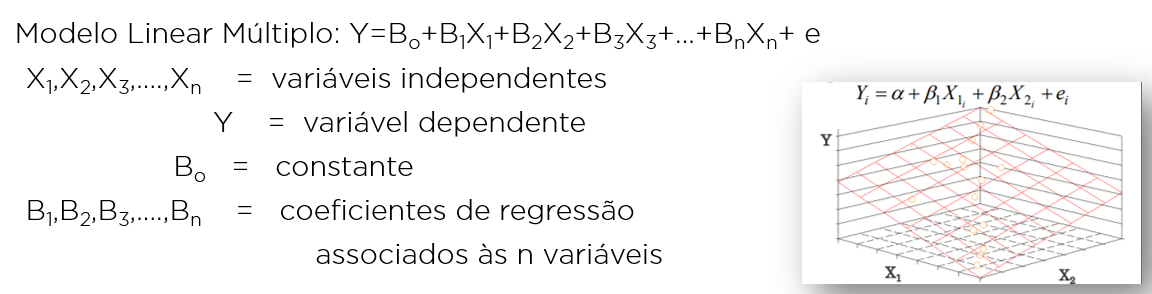

In [ ]:
# importar bibliiotecas
import statsmodels.api as sm
from scipy import stats

### Exemplo de Efeito de colinearidade nos coeficientes do modelo

In [ ]:
# Matriz de Correlação de Pearson
df[var_num].corr(method='pearson')

In [ ]:
# Modelo de regressão linear simples
# Selecionar as variáveis preditoras e a resposta do modelo
X = df[['temperatura']]
y = df['total']

In [ ]:
#Modelo de regressão linear simples
X_ = sm.add_constant(X)
model = sm.OLS(y, X_).fit()
#results = model.fit()
print(model.summary())

In [ ]:
# Modelo de regressão linear múltipla
# Selecionar as variáveis preditoras e a resposta do modelo
X = df[['temperatura','sensacao_termica']]
y = df['total']

In [ ]:
#Modelo de regressão linear simples
X_ = sm.add_constant(X)
model = sm.OLS(y, X_).fit()
#results = model.fit()
print(model.summary())

## Exemplo de variável preditora qualitativa no modelo: estação do ano

In [ ]:
# Análise quantitativa versus qualitativa
# Variáveis qualitativas
# Identificar se há associação entre CNT ( variável quantitativa) e Estação do ano (variável qualitativa)
# Box Plot
sns.boxplot(x='estacao', y='total', data=df_copy, palette = 'rainbow')

In [ ]:
# Modelo de regressão linear com variáveis qualitativas
# Selecionar as variáveis preditoras e a resposta do modelo
X = df[['estacao_2', 'estacao_3', 'estacao_4']]
y = df['total']

In [ ]:
#Modelo de regressão linear múltipla
X_ = sm.add_constant(X)
model = sm.OLS(y, X_).fit()
#results = model.fit()
print(model.summary())